In [89]:
#Q1: Extract all vegetable data of Noida Vegetable Market from the above URL, between 15th November 2021 and 31 March 2023. 

In [90]:
import requests

In [91]:
import pandas as pd
import json

In [92]:
"""data = []

date_range = pd.date_range(start="2021-11-15", end="2023-03-31", freq="D")
for date in date_range:
    date_str = date.strftime("%Y-%m-%d")
    
    url = f"https://vegetablemarketprice.com/api/data/market/noida/daywise?date={date_str}"

    response = requests.get(url)
    
    if response.status_code == 200:
        vegetable_json = response.json()
        
        for item in vegetable_json["data"]:
            row = {
                "date": date_str,
                "vegetableName": item["vegetableName"],
                "price": item["price"],
                "units": item["units"],
                "id": item["id"],
                "shopingMallPrice": item["shopingMallPrice"],
                "retailPrice": item["retailPrice"]
            }
            data.append(row)
    
df_ = pd.DataFrame(data)"""

'data = []\n\ndate_range = pd.date_range(start="2021-11-15", end="2023-03-31", freq="D")\nfor date in date_range:\n    date_str = date.strftime("%Y-%m-%d")\n    \n    url = f"https://vegetablemarketprice.com/api/data/market/noida/daywise?date={date_str}"\n\n    response = requests.get(url)\n    \n    if response.status_code == 200:\n        vegetable_json = response.json()\n        \n        for item in vegetable_json["data"]:\n            row = {\n                "date": date_str,\n                "vegetableName": item["vegetableName"],\n                "price": item["price"],\n                "units": item["units"],\n                "id": item["id"],\n                "shopingMallPrice": item["shopingMallPrice"],\n                "retailPrice": item["retailPrice"]\n            }\n            data.append(row)\n    \ndf_ = pd.DataFrame(data)'

In [93]:
#df_

In [94]:
#Q2: What was the average monthly price of each vegetable in the Noida Vegetable Market between 15th November 2021 and 31 March 2023?

In [95]:
xls = "C:/Users/91748/Downloads/vegetable_data2 (2).xlsx"

df = pd.read_excel(xls)

df

,date,vegetableName,price,units,id,shopingMallPrice,retailPrice
0,2022-01-26,Onion Big,40,1kg,onionBig,48 - 66,46 - 51
1,2022-01-26,Onion Small,63,1kg,onionSmall,76 - 104,72 - 80
2,2022-01-26,Tomato,19,1kg,tomato,23 - 31,22 - 24
3,2022-01-26,Green Chilli,43,1kg,greenChili,52 - 71,49 - 55
4,2022-01-26,Beetroot,49,1kg,beetroot,59 - 81,56 - 62
...,...,...,...,...,...,...,...
23215,2023-03-31,Shallot (Pearl Onion),34,1kg,shallot,41 - 56,39 - 43
23216,2023-03-31,Snake Gourd,30,1kg,snakeGourd,36 - 50,35 - 38
23217,2023-03-31,Sorrel Leaves,14,1kg,sorrelLeaves,17 - 23,16 - 18
23218,2023-03-31,Spinach,15,1kg,spinach,18 - 25,17 - 19


In [96]:
df['date'] = pd.to_datetime(df['date'])

start_date = pd.to_datetime('2021-11-15')
end_date = pd.to_datetime('2023-03-31')
mask = (df['date'] >= start_date) & (df['date'] <= end_date)
df = df.loc[mask]

df['Month'] = df['date'].dt.strftime('%Y-%m')
Avg = df.groupby(['vegetableName', 'Month'])['price'].mean()

Avg

vegetableName    Month  
Amaranth Leaves  2022-01    14.666667
                 2022-02    14.535714
                 2022-03    15.774194
                 2022-04    15.233333
                 2022-05    15.129032
                              ...    
Tomato           2022-11    22.500000
                 2022-12    18.258065
                 2023-01    22.967742
                 2023-02    23.928571
                 2023-03    26.129032
Name: price, Length: 810, dtype: float64

In [97]:
#Q3 : Using the data available on the above website, can we identify any differences or similarities in the prices of vegetables in Noida Vegetable Market and nearby located vegetable markets, and what could be the possible reasons for such variations in prices?

In [98]:
df.head(10)

,date,vegetableName,price,units,id,shopingMallPrice,retailPrice,Month
0,2022-01-26,Onion Big,40,1kg,onionBig,48 - 66,46 - 51,2022-01
1,2022-01-26,Onion Small,63,1kg,onionSmall,76 - 104,72 - 80,2022-01
2,2022-01-26,Tomato,19,1kg,tomato,23 - 31,22 - 24,2022-01
3,2022-01-26,Green Chilli,43,1kg,greenChili,52 - 71,49 - 55,2022-01
4,2022-01-26,Beetroot,49,1kg,beetroot,59 - 81,56 - 62,2022-01
5,2022-01-26,Potato,22,1kg,potato,26 - 36,25 - 28,2022-01
6,2022-01-26,Raw Banana (Plantain),6,1kg,plantain,0,0,2022-01
7,2022-01-26,Amaranth Leaves,16,1kg,amaranthLeaves,19 - 26,18 - 20,2022-01
8,2022-01-26,Amla,50,1kg,amla,60 - 83,58 - 64,2022-01
9,2022-01-26,Ash gourd,21,1kg,ashGourd,25 - 35,24 - 27,2022-01


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23220 entries, 0 to 23219
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              23220 non-null  datetime64[ns]
 1   vegetableName     23220 non-null  object        
 2   price             23220 non-null  int64         
 3   units             23220 non-null  object        
 4   id                23220 non-null  object        
 5   shopingMallPrice  23220 non-null  object        
 6   retailPrice       23220 non-null  object        
 7   Month             23220 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 1.6+ MB


In [100]:
df.describe()

,price
count,23220.000000
mean,33.342334
std,20.845399
min,3.000000
25%,20.000000
50%,28.000000
75%,40.000000
max,150.000000


In [109]:
df.head(5)

,vegetableName,shopingMallPrice,retailPrice
0,Onion Big,57.0,48.5
1,Onion Small,90.0,76.0
2,Tomato,27.0,23.0
3,Green Chilli,61.5,52.0
4,Beetroot,70.0,59.0


In [102]:
import matplotlib.pyplot as plt
import numpy as np

In [103]:
#converting 'shopingMallPrice' dtype from object to float

df['shopingMallPrice'] = df['shopingMallPrice'].str.replace('-', ' ')

df['shopingMallPrice'] = df['shopingMallPrice'].apply(lambda x: str(x) if x is not None else x)

df['shopingMallPrice'] = df['shopingMallPrice'].apply(lambda x: np.mean([float(i) for i in x.split()]) if isinstance(x, str) else x)

df['shopingMallPrice'] = df['shopingMallPrice'].astype(float)

In [104]:
#converting 'retailPrice' dtype from object to float

df['retailPrice'] = df['retailPrice'].str.replace('-', ' ')

df['retailPrice'] = df['retailPrice'].apply(lambda x: str(x) if x is not None else x)

df['retailPrice'] = df['retailPrice'].apply(lambda x: np.mean([float(i) for i in x.split()]) if isinstance(x, str) else x)

df['retailPrice'] = df['retailPrice'].astype(float)

In [110]:
df.head(5)

,vegetableName,shopingMallPrice,retailPrice
0,Onion Big,57.0,48.5
1,Onion Small,90.0,76.0
2,Tomato,27.0,23.0
3,Green Chilli,61.5,52.0
4,Beetroot,70.0,59.0


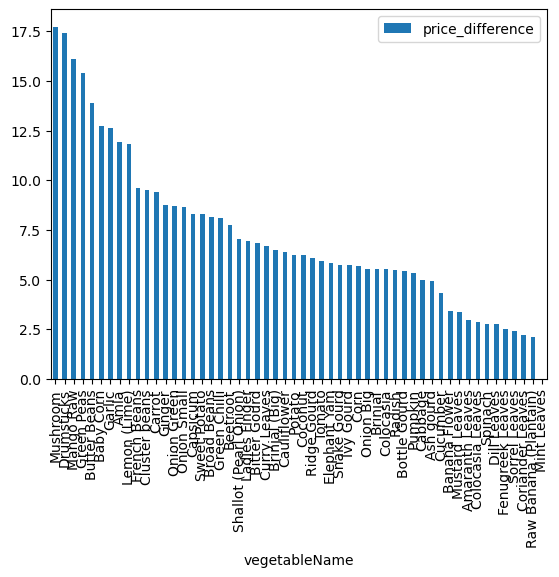

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

In [119]:
df = df[['vegetableName','shopingMallPrice', 'retailPrice']]

df1 =df.groupby('vegetableName').mean()

df1['price_difference'] = df1['shopingMallPrice']-df1['retailPrice']

df1 = df1.sort_values('price_difference', ascending=False)

df1.plot(kind='bar', y='price_difference')


#plt.plot(df1['price_difference'],df1['vegetableName'])

plt.show()

plt.figure(figsize = (20,20))

In [ ]:
#The possible reasons for such variations in prices may be :
#a) Location: The foremost reason of price difference of vegetable in Shopping mall and retail shop will vary on basis of Location.
#b) Demand and Supply: One of the important reason for varying of the price depends on Demand and Supply of Vegetables.
#c) Freshness and Quality: Vegetables with better quality and freshness will be of higher price.
#d) Storage and Transportation: The storage and transportation for vegetable are more likely to be expensive.
#e) Seasonal : Seasonal vegetables that are out of seasons are more expensive than the seasonal vegetable.

In [ ]:
df.columns